In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-gdp-and-co-emissions-dataset-19602022/data_descriptions.txt
/kaggle/input/global-gdp-and-co-emissions-dataset-19602022/README.md
/kaggle/input/global-gdp-and-co-emissions-dataset-19602022/gdp_co2_by_country.csv
/kaggle/input/global-gdp-and-co-emissions-dataset-19602022/gdp_co2_by_country_v2.csv


In [2]:
import pandas as pd
import numpy as np
import os

# Check all folders and files in /kaggle/input
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f" - {filename}")


Directory: /kaggle/input
Directory: /kaggle/input/global-gdp-and-co-emissions-dataset-19602022
 - data_descriptions.txt
 - README.md
 - gdp_co2_by_country.csv
 - gdp_co2_by_country_v2.csv


In [5]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"\n📁 Directory: {dirname}")
    for filename in filenames:
        print(f"  📄 File: {filename}")



📁 Directory: /kaggle/input

📁 Directory: /kaggle/input/global-gdp-and-co-emissions-dataset-19602022
  📄 File: data_descriptions.txt
  📄 File: README.md
  📄 File: gdp_co2_by_country.csv
  📄 File: gdp_co2_by_country_v2.csv


In [6]:
import pandas as pd

# Correct file path based on your dataset
file_path = "/kaggle/input/global-gdp-and-co-emissions-dataset-19602022/gdp_co2_by_country.csv"

# Load the data
df = pd.read_csv(file_path)

# Quick check
df.shape, df.columns, df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


((12507, 21),
 Index(['Country Name', 'Country Code', 'Year', 'Population', 'Pop Log',
        'Pop Outliers', 'Pop Category', 'CO2', 'CO2 %', 'Per Capita CO2',
        'Cumulative CO2', 'CO2 Log', 'CO2 Outliers', 'Emissions Category',
        'GDP USD', 'GDP USD Log', 'GDP %', 'GDP % Winsor', 'GDP Per Capita',
        'GDP Category', 'CO2 Per GDP'],
       dtype='object'),
   Country Name Country Code  Year  Population    Pop Log Pop Outliers  \
 0  Afghanistan          AFG  1961   9214082.0  16.036244  not outlier   
 1  Afghanistan          AFG  1962   9404411.0  16.056689  not outlier   
 2  Afghanistan          AFG  1963   9604491.0  16.077741  not outlier   
 3  Afghanistan          AFG  1964   9814318.0  16.099353  not outlier   
 4  Afghanistan          AFG  1965  10036003.0  16.121690  not outlier   
 
   Pop Category    CO2      CO2 %  Per Capita CO2  ...   CO2 Log  CO2 Outliers  \
 0       1M-10M  0.491        NaN    5.328800e-08  ...  0.399447         False   
 1       1M-1

In [7]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check for nulls
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12507 entries, 0 to 12506
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        12507 non-null  object 
 1   Country Code        12507 non-null  object 
 2   Year                12507 non-null  int64  
 3   Population          12507 non-null  float64
 4   Pop Log             12507 non-null  float64
 5   Pop Outliers        12507 non-null  object 
 6   Pop Category        12507 non-null  object 
 7   CO2                 12507 non-null  float64
 8   CO2 %               12300 non-null  float64
 9   Per Capita CO2      12507 non-null  float64
 10  Cumulative CO2      12507 non-null  float64
 11  CO2 Log             12507 non-null  float64
 12  CO2 Outliers        12507 non-null  object 
 13  Emissions Category  12507 non-null  object 
 14  GDP USD             12507 non-null  float64
 15  GDP USD Log         12507 non-null  float64
 16  GDP 

Country Name            0
Country Code            0
Year                    0
Population              0
Pop Log                 0
Pop Outliers            0
Pop Category            0
CO2                     0
CO2 %                 207
Per Capita CO2          0
Cumulative CO2          0
CO2 Log                 0
CO2 Outliers            0
Emissions Category      0
GDP USD                 0
GDP USD Log             0
GDP %                   0
GDP % Winsor            0
GDP Per Capita          0
GDP Category            0
CO2 Per GDP             0
dtype: int64

**How has global CO₂ and GDP changed over time?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

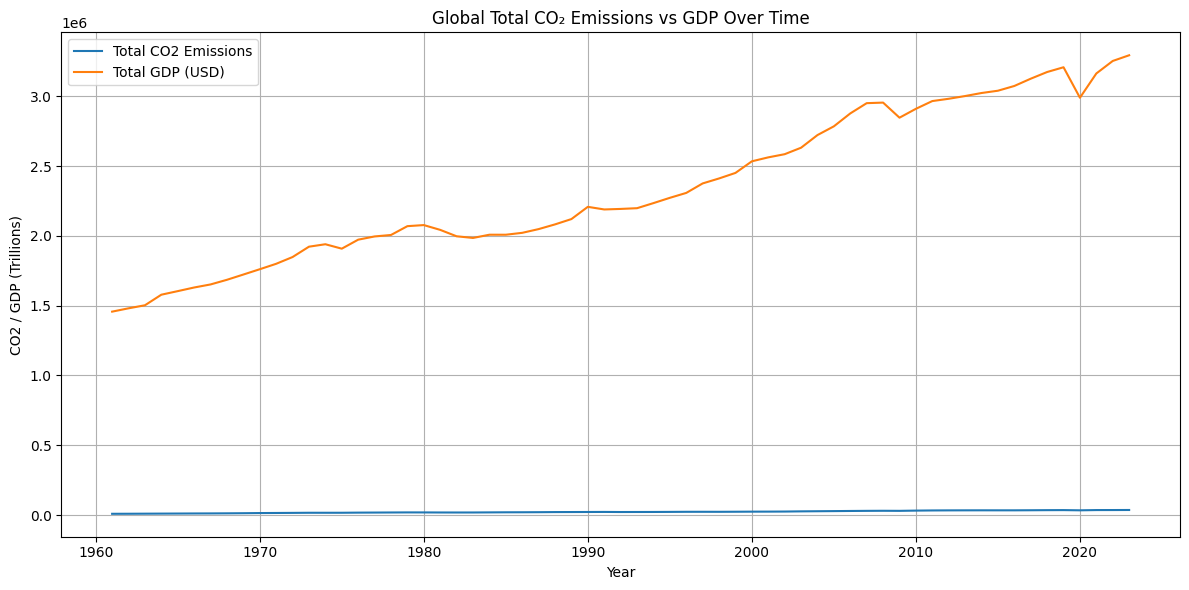

In [8]:
# Global total CO2 and GDP by year
global_trend = df.groupby("Year")[["CO2", "GDP USD"]].sum().reset_index()

# Plot trends
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x="Year", y="CO2", label="Total CO2 Emissions")
sns.lineplot(data=global_trend, x="Year", y="GDP USD", label="Total GDP (USD)")
plt.title("Global Total CO₂ Emissions vs GDP Over Time")
plt.ylabel("CO2 / GDP (Trillions)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The line plot likely shows both CO₂ emissions and GDP increasing over time, but possibly at different rates — a useful way to visualize the relationship between economic growth and environmental impact.

**Who are the top CO₂ emitters and top economies in 2022?**

In [9]:
# Filter for 2022 data
df_2022 = df[df["Year"] == 2022]

# Top 10 CO2 emitters
top_co2_emitters = df_2022.sort_values("CO2", ascending=False).head(10)[["Country Name", "CO2"]]

# Top 10 GDP countries
top_gdp_countries = df_2022.sort_values("GDP USD", ascending=False).head(10)[["Country Name", "GDP USD"]]

# Display results
print("🔸 Top 10 CO₂ Emitters in 2022:")
print(top_co2_emitters)

print("\n🔸 Top 10 Economies by GDP in 2022:")
print(top_gdp_countries)


🔸 Top 10 CO₂ Emitters in 2022:
             Country Name        CO2
2405                China  11350.538
12002       United States   5078.871
5298                India   2831.166
9353   Russian Federation   1802.190
5802                Japan   1032.687
5424   Iran, Islamic Rep.    800.747
5361            Indonesia    737.073
9794         Saudi Arabia    723.331
4416              Germany    671.472
10548         Korea, Rep.    602.092

🔸 Top 10 Economies by GDP in 2022:
        Country Name        GDP USD
6592   Liechtenstein  167187.157310
1292         Bermuda  110427.556781
6718      Luxembourg  109714.924316
5550         Ireland   99677.473102
10989    Switzerland   90043.410040
8503          Norway   79434.625645
10107      Singapore   67948.892827
12002  United States   64342.117938
9227           Qatar   64315.626367
599        Australia   61009.807715


**Top 10 CO₂ Emitters in 2022 (Barplot)**

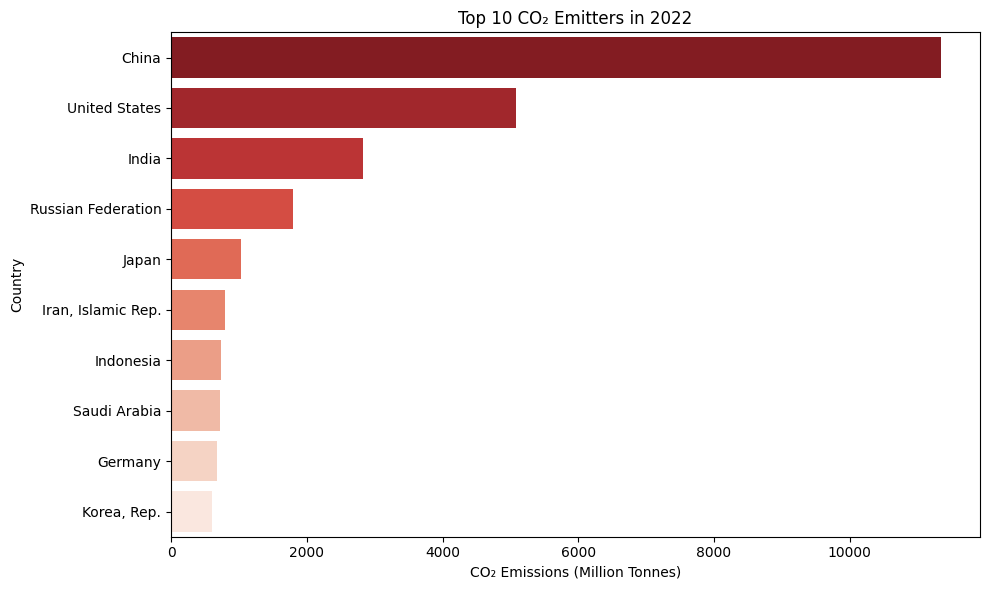

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for year 2022
data_2022 = df[df['Year'] == 2022]

# Get top 10 CO2 emitting countries
top10_co2 = data_2022.sort_values(by='CO2', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_co2, x='CO2', y='Country Name', palette='Reds_r')
plt.title('Top 10 CO₂ Emitters in 2022')
plt.xlabel('CO₂ Emissions (Million Tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Top 10 Countries by GDP in 2022 (Barplot)**

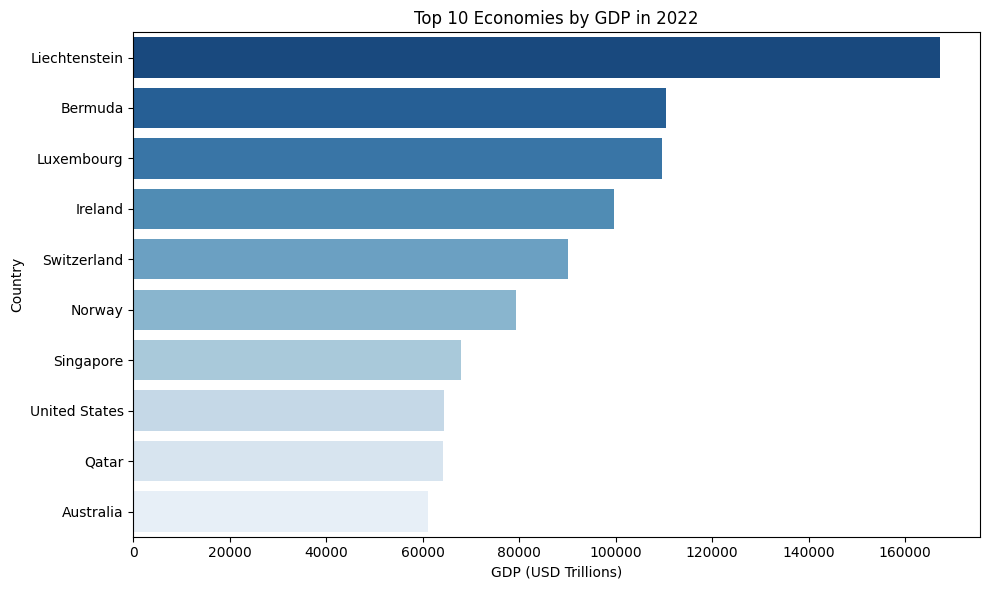

In [11]:
# Get top 10 countries by GDP
top10_gdp = data_2022.sort_values(by='GDP USD', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_gdp, x='GDP USD', y='Country Name', palette='Blues_r')
plt.title('Top 10 Economies by GDP in 2022')
plt.xlabel('GDP (USD Trillions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()








**Top 10 Countries with Highest CO₂ per GDP in 2022**

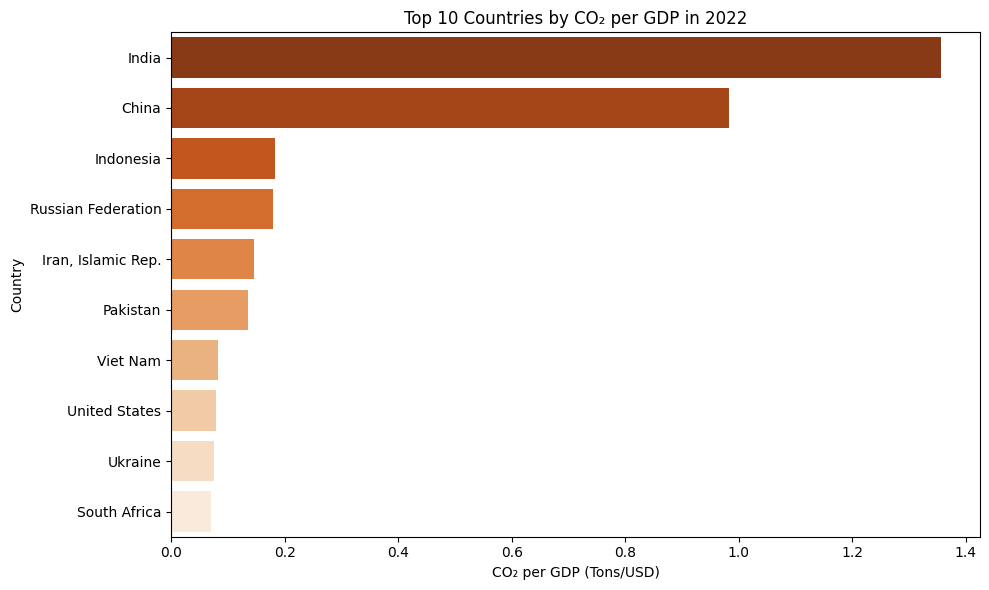

In [12]:
# Sort countries by CO2 per GDP (high to low)
top10_co2_per_gdp = data_2022.sort_values(by='CO2 Per GDP', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_co2_per_gdp, x='CO2 Per GDP', y='Country Name', palette='Oranges_r')
plt.title('Top 10 Countries by CO₂ per GDP in 2022')
plt.xlabel('CO₂ per GDP (Tons/USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Top 10 Countries with Lowest CO₂ per GDP in 2022** \
These are the countries that produce the least amount of CO₂ per dollar of GDP, indicating high efficiency or cleaner economies.

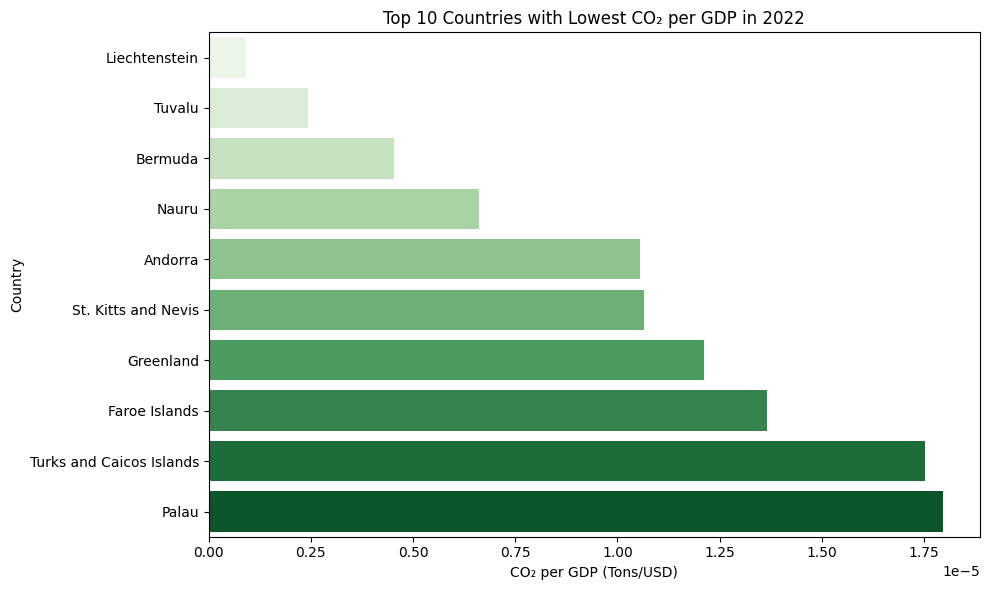

In [13]:
# Sort countries by CO2 per GDP (low to high)
bottom10_co2_per_gdp = data_2022.sort_values(by='CO2 Per GDP', ascending=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10_co2_per_gdp, x='CO2 Per GDP', y='Country Name', palette='Greens')
plt.title('Top 10 Countries with Lowest CO₂ per GDP in 2022')
plt.xlabel('CO₂ per GDP (Tons/USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


**Relationship Between GDP Per Capita and CO₂ Per Capita (2022)**\
This will show whether richer countries emit more CO₂ per person — a key sustainability and policy question.

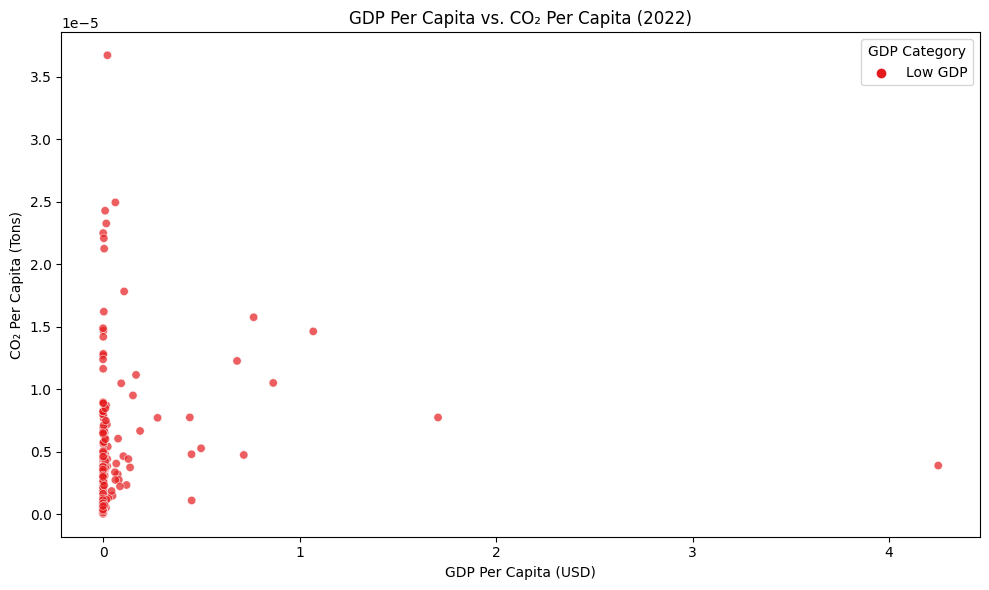

In [14]:
# Scatter plot: GDP Per Capita vs CO2 Per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_2022,
    x='GDP Per Capita',
    y='Per Capita CO2',
    hue='GDP Category',
    palette='Set1',
    alpha=0.7
)

plt.title('GDP Per Capita vs. CO₂ Per Capita (2022)')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('CO₂ Per Capita (Tons)')
plt.legend(title='GDP Category')
plt.tight_layout()
plt.show()


 **Insight: Economic Wealth vs. Environmental Impact (2022)**\
This scatter plot explores the relationship between GDP per capita and CO₂ emissions per capita for countries in 2022. A positive trend is visible — in general, countries with higher economic output per person tend to emit more CO₂ per person.

However, the relationship is not perfectly linear. For example, some high-income countries like those in Western Europe show relatively lower CO₂ emissions per capita compared to countries with similar GDP levels, possibly due to cleaner energy policies. Meanwhile, some middle-income countries have disproportionately high emissions due to reliance on fossil fuels.

This visualization highlights the inequality in both economic development and environmental impact, emphasizing the need for sustainable growth strategies tailored to each country's context.